In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import pandas as pd
import scipy.sparse
import random
import tensorflow as tf

In [ ]:
''' load dataset from sklearn '''
from sklearn.datasets import fetch_rcv1
rcv1 = fetch_rcv1(shuffle=True)# change arrangment of sample randomly 

In [ ]:
N_SAMPLES = 7000 
from sklearn.utils import resample
X1, y1 = resample(rcv1.data, rcv1.target, replace=False,
                n_samples=N_SAMPLES, random_state=1234)
X1 = X1.toarray()
y1 = y1.toarray()

In [ ]:
!pip3 install susi

# **SUSI SOM**

In [ ]:
import susi

# initialize and fit SOM
som = susi.SOMClustering(n_rows=50,n_columns=50,n_iter_unsupervised =1000,
                         learning_rate_start=0.7,nbh_dist_weight_mode ="pseudo-gaussian")
                         
som.fit(X1)

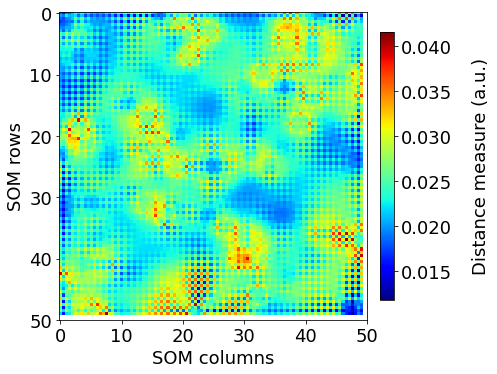

In [ ]:
from susi.SOMPlots import plot_estimation_map,plot_nbh_dist_weight_matrix,plot_som_histogram,plot_umatrix
u_matrix = som.get_u_matrix()
plot_umatrix(u_matrix, 50, 50, cmap="jet")
plt.show()

# **Plot clusters**

In [ ]:
clusters = som.get_clusters(X1)

In [ ]:
print(5)

5


In [ ]:
with open('X150.pickle', 'wb') as f:
    pickle.dump(X1, f)

with open('y150.pickle', 'wb') as f:
    pickle.dump(y1, f)

In [ ]:
import pickle
with open('clusters50.pickle', 'wb') as f:
    pickle.dump(clusters, f)

with open('som50.pickle', 'wb') as f:
    pickle.dump(som, f)

# with open('X150.pickle', 'wb') as f:
#     pickle.dump(X1, f)

# with open('y150.pickle', 'wb') as f:
#     pickle.dump(y1, f)



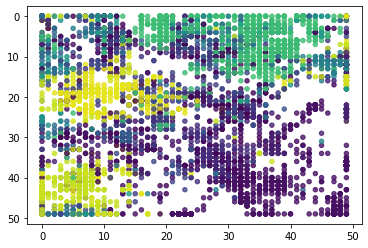

In [ ]:
plt.scatter(x=[c[1] for c in clusters], y=[c[0] for c in clusters], c=np.argmax(y1, axis=1), alpha=0.8,s=20)
plt.gca().invert_yaxis()
plt.show()

# **End**

# **Truncated SVD**

In [ ]:
from sklearn.utils import resample
from sklearn.decomposition import TruncatedSVD
N_SAMPLES = 200 
X1, y1 = resample(rcv1.data, rcv1.target, replace=False,
                n_samples=N_SAMPLES, random_state=1234)
X1 = TruncatedSVD(n_components=150).fit_transform(X1)

# **SOM**

In [ ]:
class SOM:
  def __init__(self,map_size,lr=0.01):
    '''
    param map_size: [map_w,map_h,f=103]
    '''
    self.map = np.zeros(shape=(map_size[0],map_size[1],map_size[2]))
    self.lr0 = lr
    self.lr = self.lr0 # learning rate
    self.R0 = map_size[0]/2
    self.R=self.R0 #radius

  def train(self,X,T=1000, error_threshold = 10**-20):
    Js = []
    for t in range(T):
      prev_map =self.map
      for i in range(X.shape[0]):
        x=X[i,:]
        #print("A\n")
        winner = self.find_winner(x) #winner = [5,23]
        #print("B\n")
        NS = self.get_neighborhood_strength(winner)
        updated_weights =  self.updata_weights(x,NS,len(X))
      

      self.lr = self.lr0*(1-t/T)
      self.R = self.R0*(1-t/T)
      Js.append(np.linalg.norm(prev_map - self.map))

      print("iteration: %d, LR: %.6f, R: %.6f, J: %.6f" %(t,self.lr,self.R,Js[-1]))
      if Js[-1] < error_threshold:
        print("MIN CHANGE")
        break

    return Js,updated_weights

  def visualize(self,X,y):
    self.scores = np.zeros(shape=(self.map.shape[0],self.map.shape[1],3))#3 is for RGB color
    for i in range(X):
      winner = self.find_winner(X)
      iw,jw = winner[0],winner[1]

      


  def find_winner(self,x):
    repeated_x = np.tile(x,[  self.map.shape[0],self.map.shape[1] ,1 ])
    dists = np.sum(np.abs(self.map-repeated_x),axis =2)
    #dists = np.sum((self.map-repeated_x)**2,axis =2)
    winner = np.unravel_index(np.argmin(dists, axis=None),dists.shape)

    return winner

  def get_neighborhood_strength(self,winner):
    net_mask = np.zeros(shape=(self.map.shape[0],self.map.shape[1]))

    iw,jw = winner[0],winner[1]
    net_mask[iw, jw]=1

    R = int(self.R)
    for ri in range(-R,R):
      for rj in range(-R,R):
        if (0 <= iw+ri <self.map.shape[0]) and (0<=jw+rj < self.map.shape[1]):
          net_mask[iw+ri,jw+rj]=0 if np.sqrt(ri**2 + rj**2) >R else 1/(1 + np.sqrt(ri**2 + rj**2) )

    # for r in range(1,int(self.R)):
    #   if iw-r>=0:
    #     net_mask[iw-r,jw] = 1/r
    #   if iw+r <self.map.shape[0] - 1:
    #     net_mask[iw+r,jw] = 1/r

    #   if jw-r>0:
    #     net_mask[iw,jw-r] = 1/r
    #   if jw+r <self.map.shape[1] - 1:
    #     net_mask[iw,jw+r] = 1/r
    
    return net_mask

  def updata_weights(self,x,net_strength,X_len):
      neighborhood_strength = np.tile(net_strength,[self.map.shape[2],1 ,1 ]).transpose()

      repeated_x = np.tile(x,[  self.map.shape[ 0],self.map.shape[1] ,1 ])
      Delta = repeated_x-self.map

      self.map = self.map + (self.lr/X_len) * np.multiply(neighborhood_strength,Delta)
      
      return self.map

    

In [ ]:
som_net = SOM(map_size = [20,20,X1.shape[1]],lr=0.1)
Js,weights = som_net.train(X1,500)

ValueError: ignored

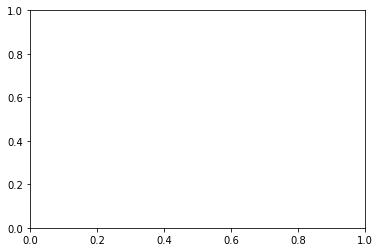

In [ ]:
plt.scatter(X1[:, 0], X1[:, 1], s=0.1, c=np.argmax(weights, axis=1))